# Classification and Regression Trees

Author: Filip Kołodziejczyk

## Prerequisites

In [1]:
from abc import ABC, abstractmethod

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.base import clone
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor,
                          plot_tree)
from sklearn.utils import resample

## Task 1

Consider dataset SAheart.data (South African Heart Disease) containing information about patients in Age between 15 and 64. Target variable chd indicates the presence of myocardial infarction.

In [2]:
filename1 = "SAheart.data"
data1 = (
    pd.read_csv(filename1, sep=",", index_col=0)
    .replace("Present", 1)
    .replace("Absent", 0)
)
classification1 = data1["chd"]
data1 = data1.drop("chd", axis=1)
data1.head()
classification1

row.names
1      1
2      1
3      0
4      1
5      1
      ..
459    0
460    1
461    0
462    0
463    1
Name: chd, Length: 462, dtype: int64

### 

### Task 1.1

Fit classification tree. Analyze how different parameters (criterion, splitter, max depth,min samples split) affect the structure and the size of the tree.

In [3]:
data1_train, data1_test, classification1_train, classification1_test = train_test_split(
    data1, classification1, test_size=0.5, random_state=2024
)

trees1 = []
for criterion in ["gini", "entropy"]:
    for splitter in ["best", "random"]:
        for max_depth in [3, 5, None]:
            for min_samples_split in [2, 3, 4]:
                tree1 = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                )
                tree1.fit(data1_train, classification1_train)
                train_score = tree1.score(data1_train, classification1_train)
                test_score = tree1.score(data1_test, classification1_test)
                trees1.append(
                    {
                        "criterion": criterion,
                        "splitter": splitter,
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "tree": tree1,
                        "train_score": train_score,
                        "test_score": test_score,
                        "node_count": tree1.tree_.node_count,
                        "depth": tree1.tree_.max_depth,
                    }
                )

trees1_df = pd.DataFrame(trees1).replace({np.NaN: "None"})
trees1_df.drop(columns=["tree"]).sort_values(by="test_score", ascending=False)

,criterion,splitter,max_depth,min_samples_split,train_score,test_score,node_count,depth
14,gini,random,5.0,4,0.748918,0.735931,27,5
10,gini,random,3.0,3,0.705628,0.722944,15,3
9,gini,random,3.0,2,0.683983,0.714286,13,3
13,gini,random,5.0,3,0.761905,0.701299,37,5
28,entropy,random,3.0,3,0.679654,0.679654,11,3
31,entropy,random,5.0,3,0.770563,0.675325,37,5
32,entropy,random,5.0,4,0.787879,0.670996,39,5
29,entropy,random,3.0,4,0.666667,0.666667,11,3
15,gini,random,None,2,1.000000,0.662338,147,16
27,entropy,random,3.0,2,0.658009,0.658009,13,3


### Task 1.2

Draw a structure of the tree.

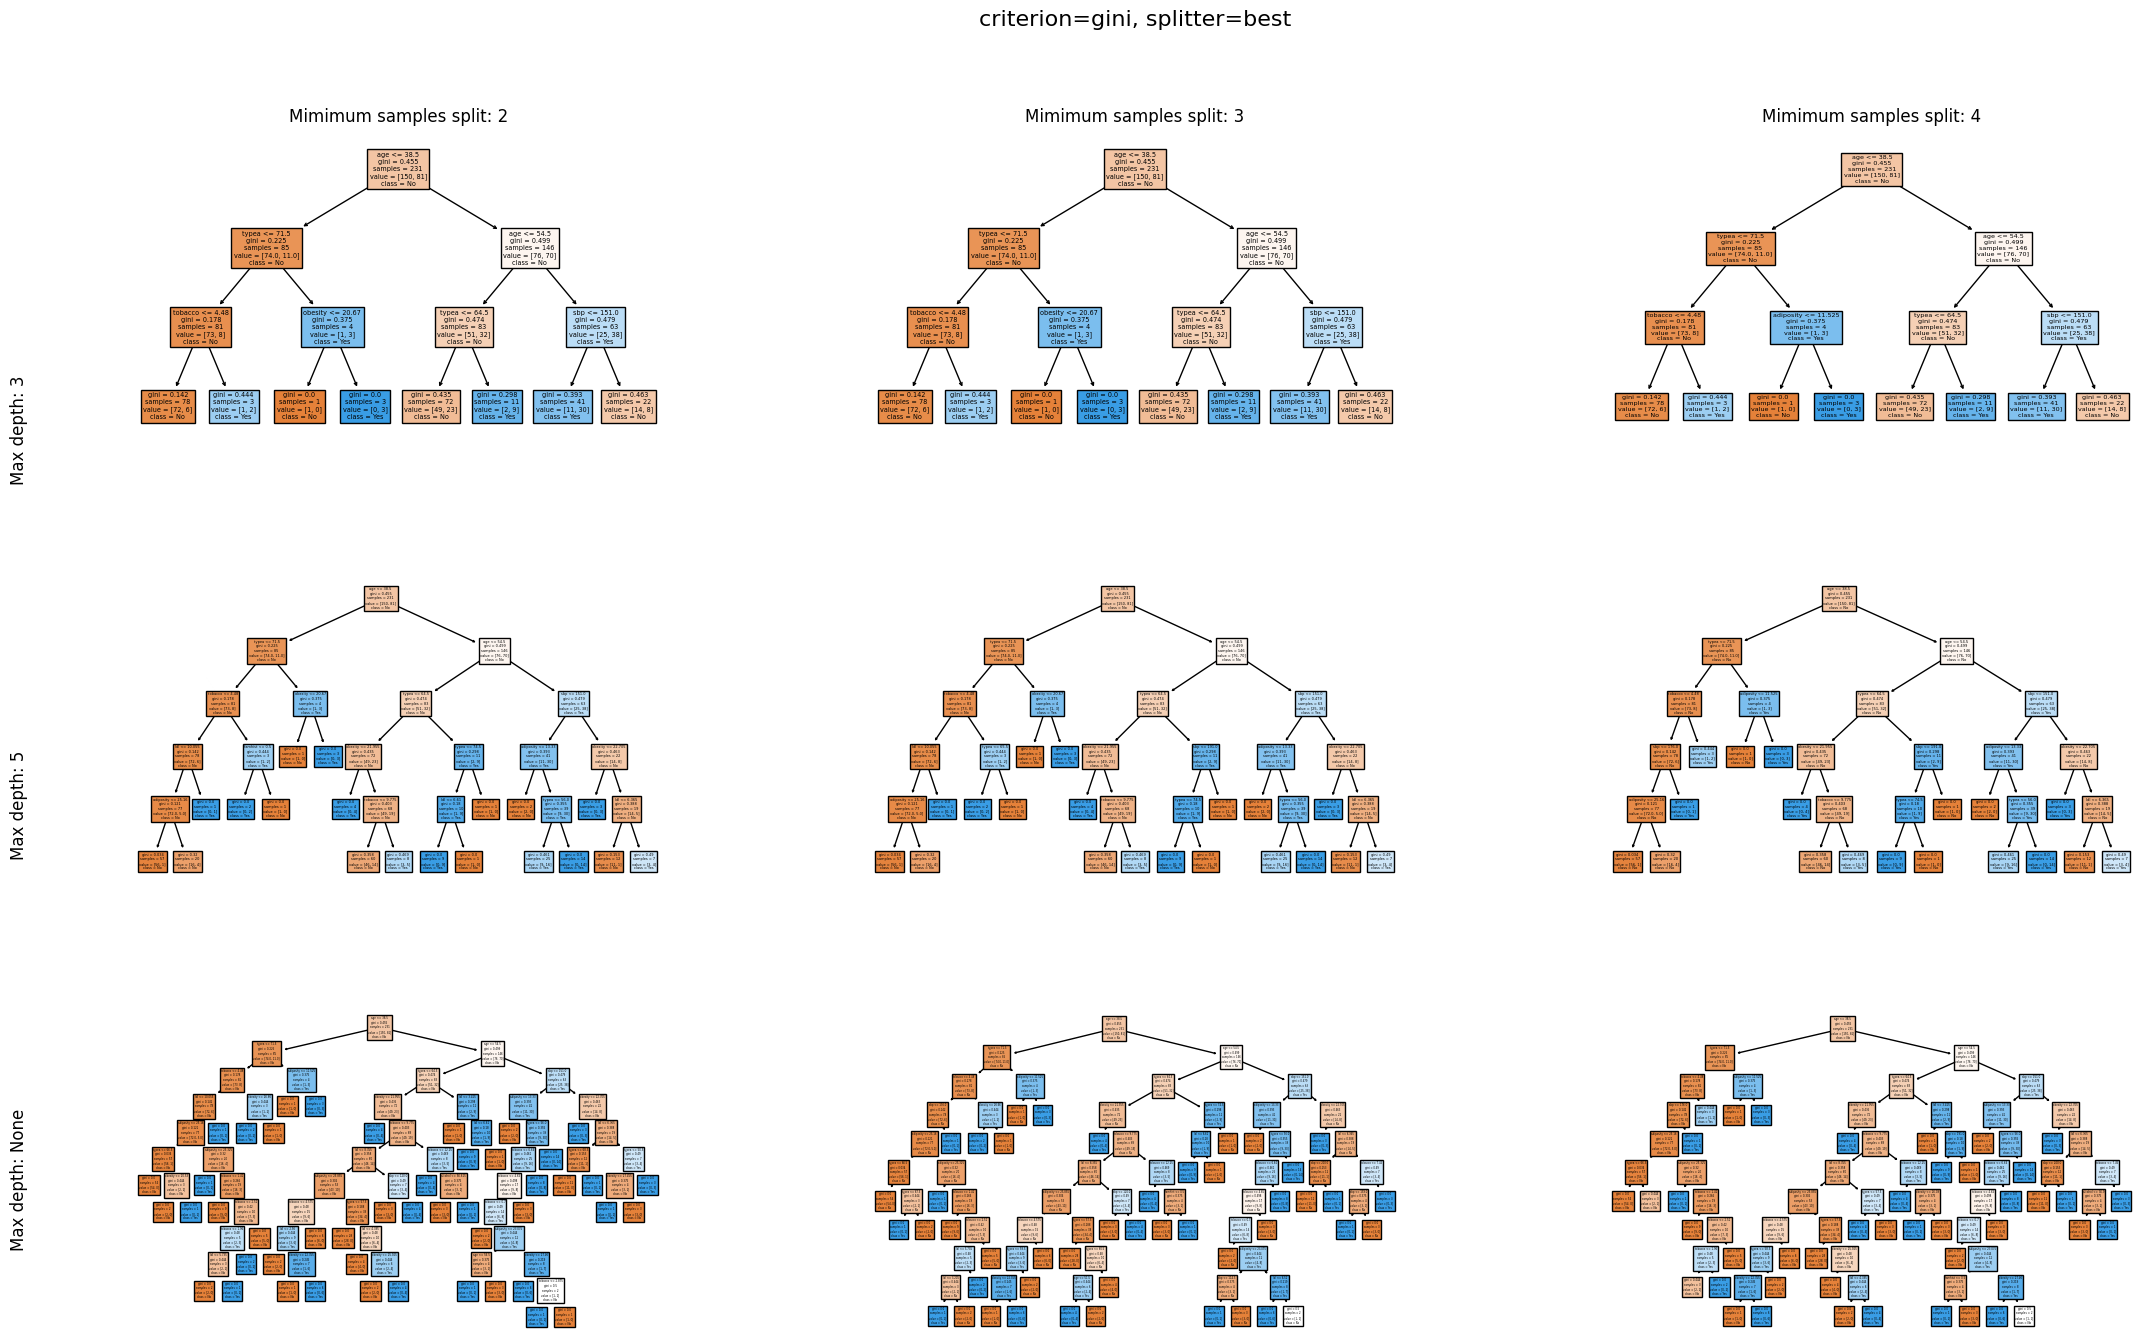

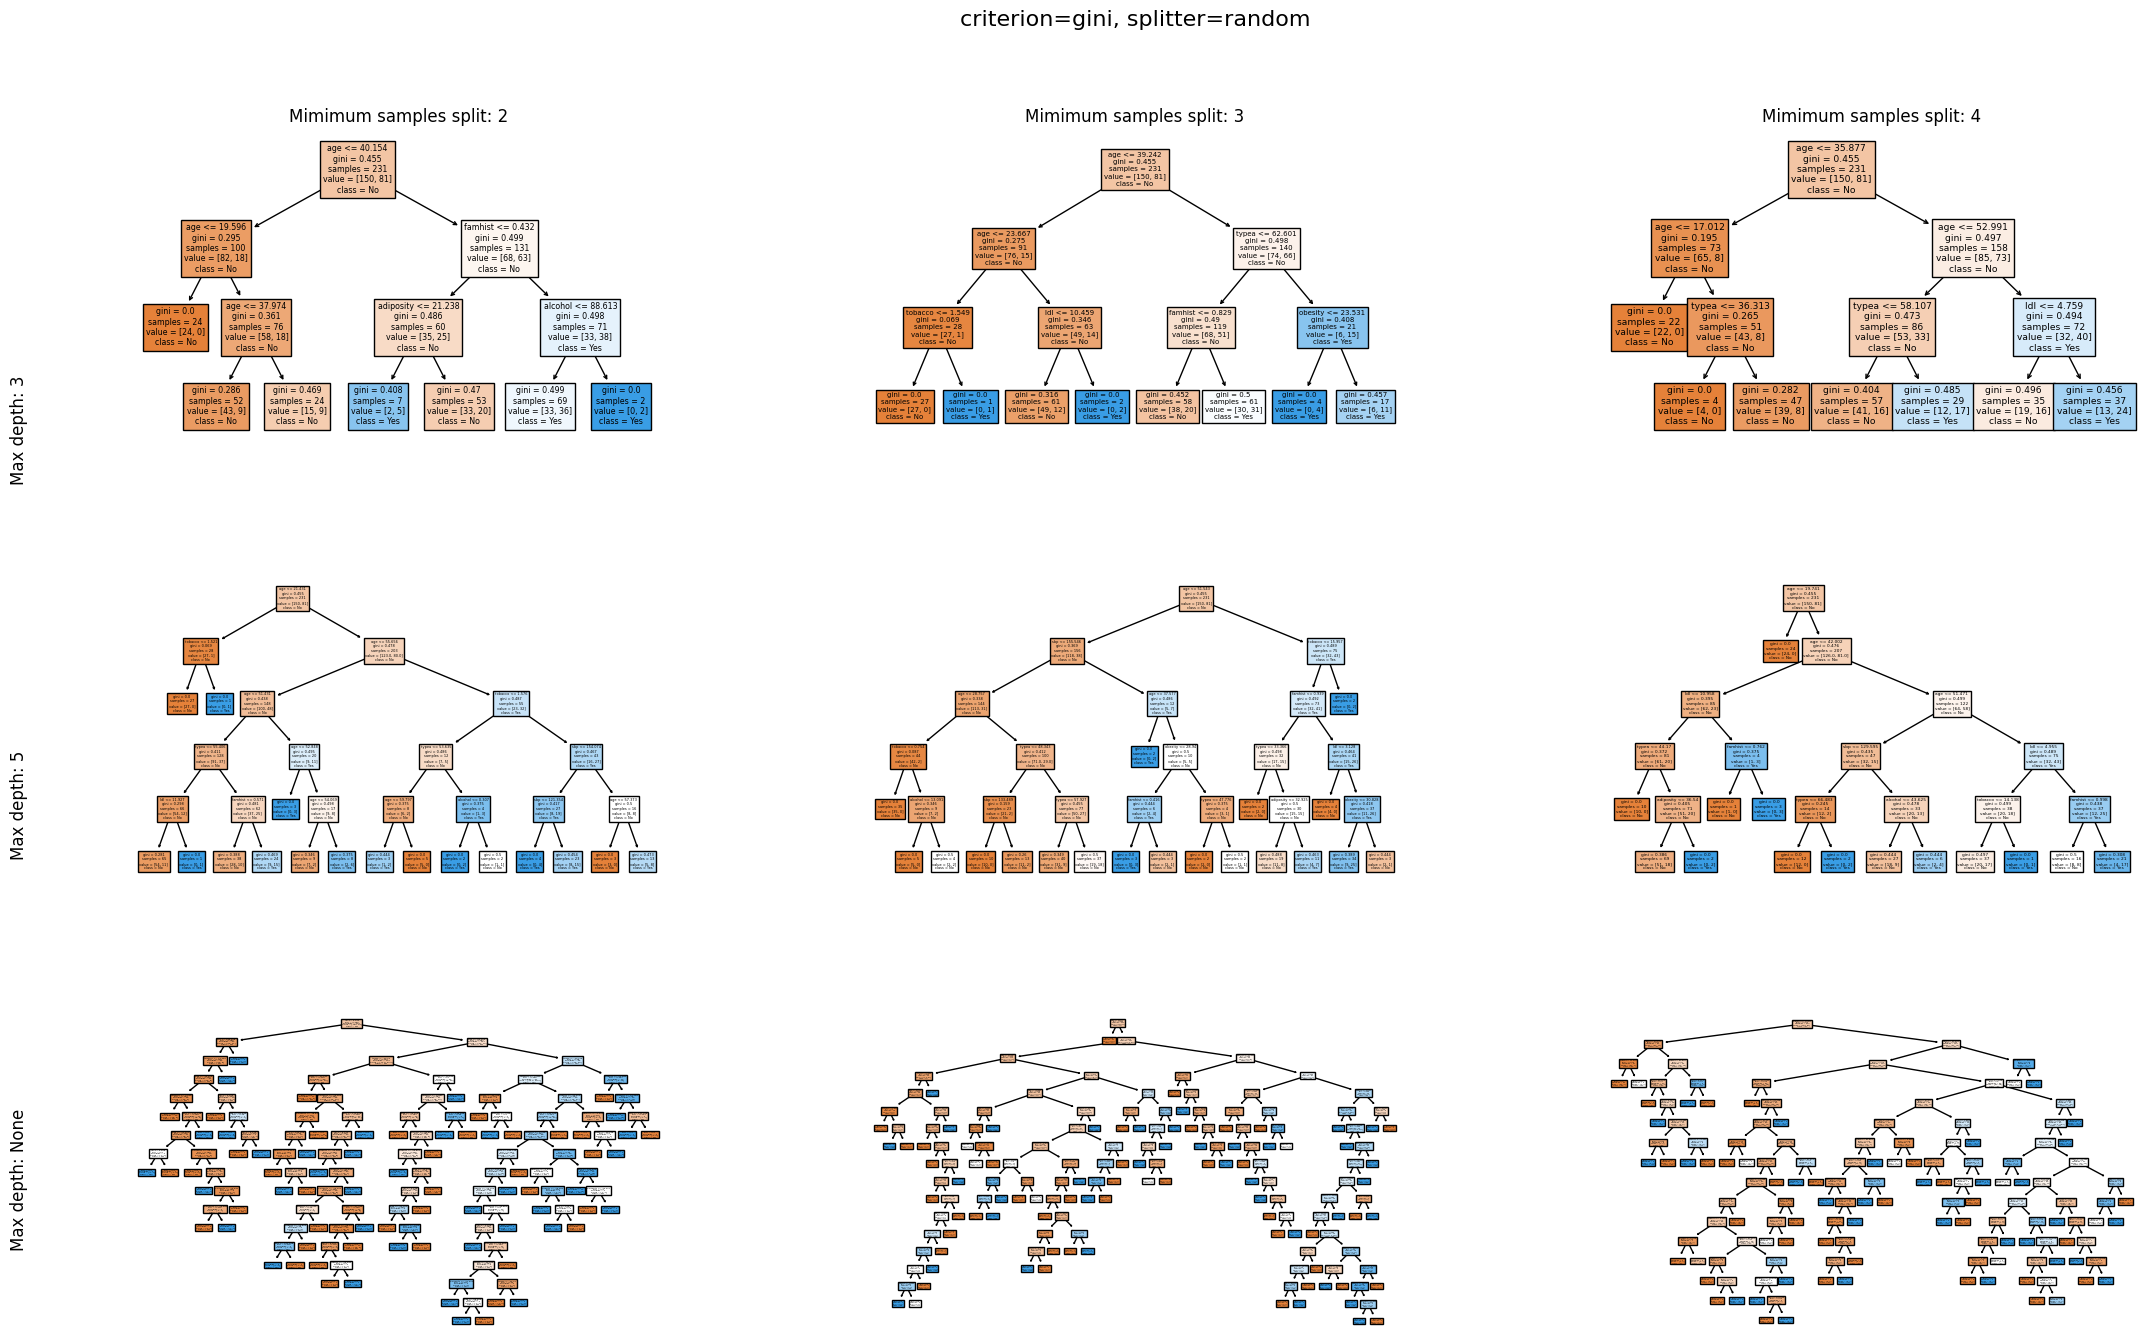

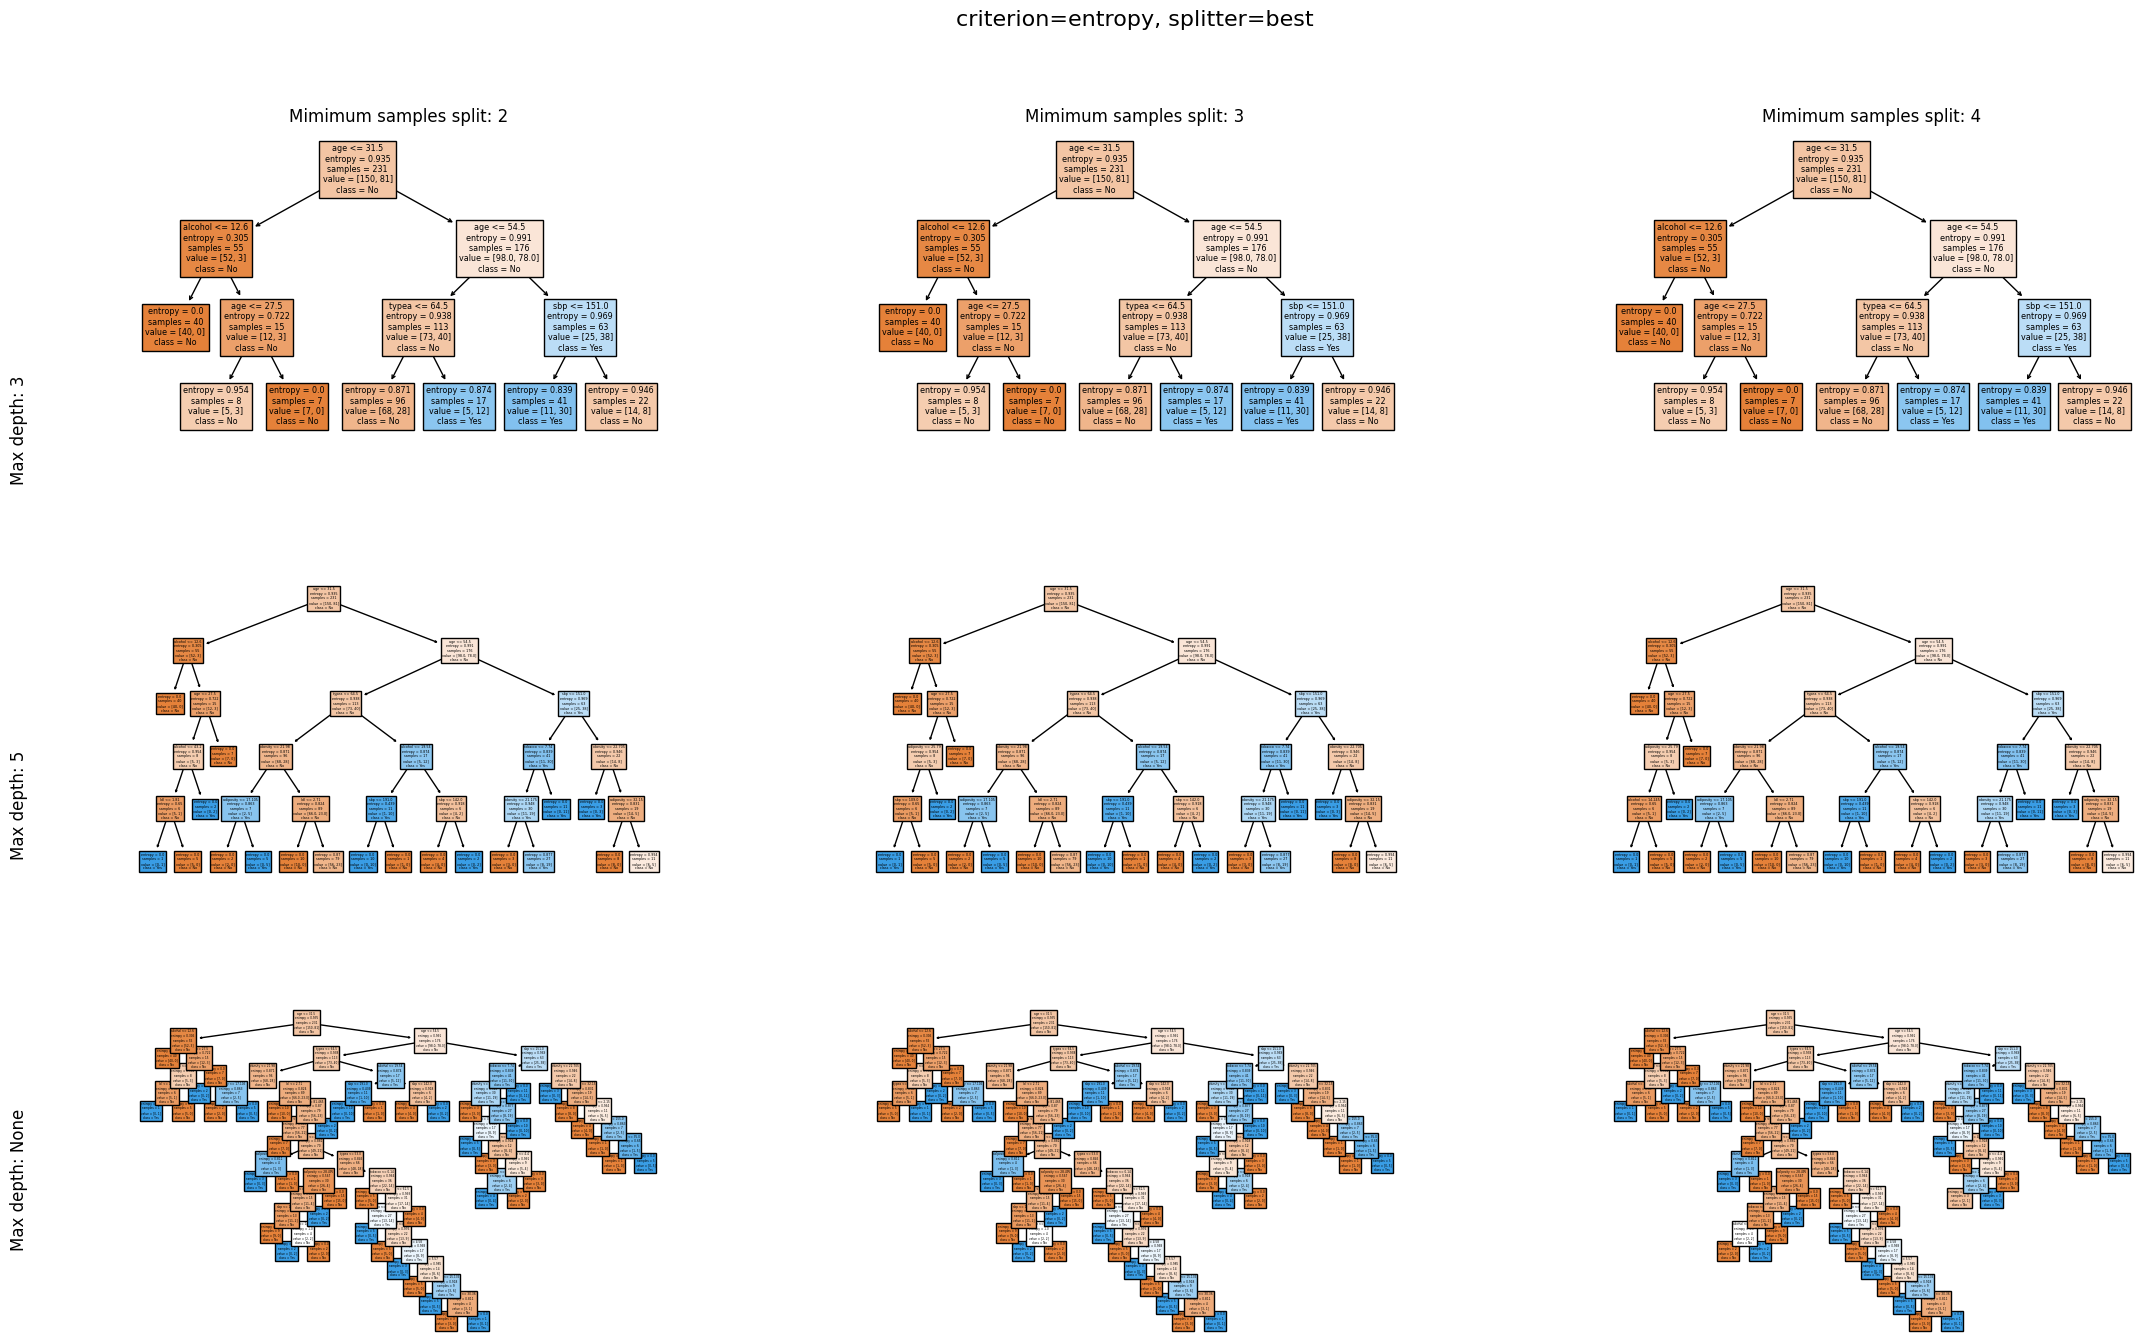

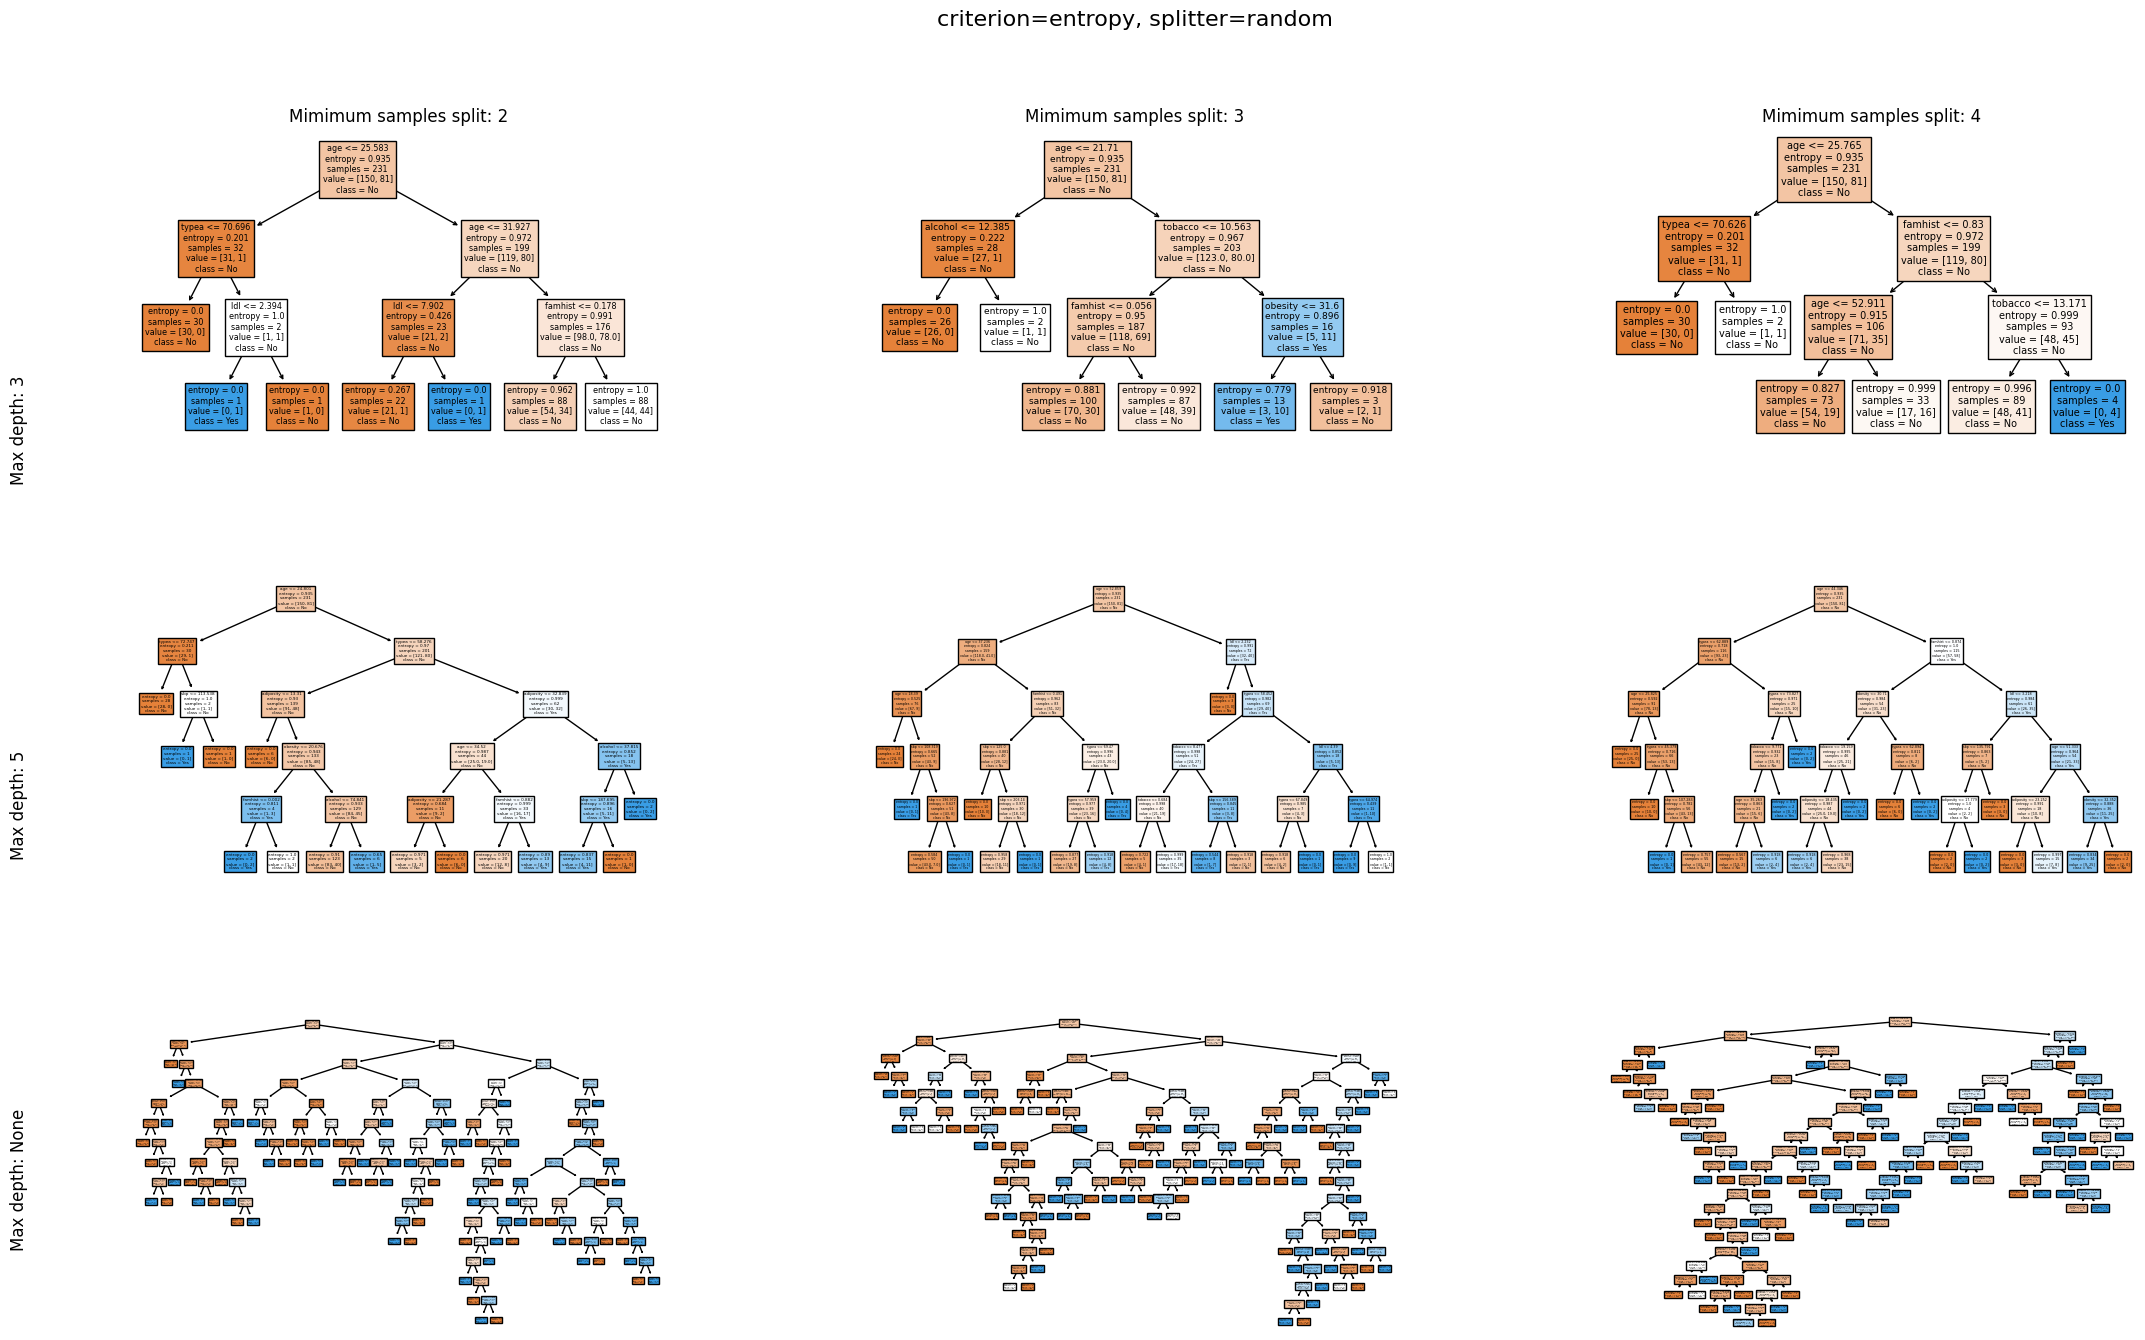

In [4]:
for criterion in trees1_df["criterion"].unique():
    for splitter in trees1_df["splitter"].unique():
        filtered = trees1_df[
            (trees1_df["criterion"] == criterion) & (trees1_df["splitter"] == splitter)
        ]

        fig, axs = plt.subplots(3, 3, figsize=(25, 15))
        fig.suptitle(f"criterion={criterion}, splitter={splitter}", fontsize=16)

        for i, max_depth in enumerate([3, 5, "None"]):
            for j, min_samples_split in enumerate([2, 3, 4]):
                ax = axs[i, j]
                filtered_tree = filtered[
                    (filtered["max_depth"] == max_depth)
                    & (filtered["min_samples_split"] == min_samples_split)
                ].iloc[0]
                plot_tree(
                    filtered_tree.tree,
                    filled=True,
                    feature_names=data1.columns,
                    class_names=["No", "Yes"],
                    ax=ax,
                )

        for ax, col in zip(axs[0], [2, 3, 4]):
            ax.set_title(f"Mimimum samples split: {col}")
        depths = ["3", "5", "None"]
        for i, depth in enumerate(depths):
            plt.figtext(
                0.05,
                0.7 - i * 0.25,
                f"Max depth: {depth}",
                rotation=90,
                size="large",
                va="center",
            )

        plt.subplots_adjust(
            left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4
        )
        plt.show()

### Task 1.3

Prune the default tree using cost-complexity criterion.

Before pruning: train score=1.0, test score=0.6406926406926406


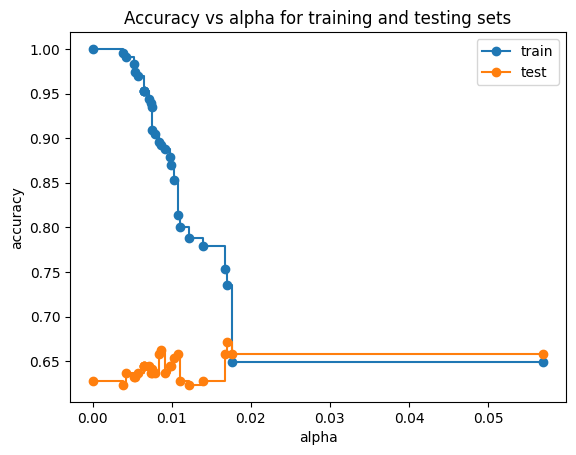

In [5]:
tree1 = DecisionTreeClassifier()
tree1.fit(data1_train, classification1_train)
train_score = tree1.score(data1_train, classification1_train)
test_score = tree1.score(data1_test, classification1_test)
print(f'Before pruning: train score={train_score}, test score={test_score}')

ccp_path = tree1.cost_complexity_pruning_path(data1_train, classification1_train)
ccp_alphas= ccp_path.ccp_alphas

ccp_trees1 = []
for ccp_alpha in ccp_alphas:
    ccp_tree = DecisionTreeClassifier(random_state=2024, ccp_alpha=ccp_alpha)
    ccp_tree.fit(data1_train, classification1_train)
    ccp_trees1.append(ccp_tree)

train_scores = [ccp_tree.score(data1_train, classification1_train) for ccp_tree in ccp_trees1]
test_scores = [ccp_tree.score(data1_test, classification1_test) for ccp_tree in ccp_trees1]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

## Task 2

Dataset fitness.txt corresponds to men’s performance parameters measured in the 1.5 mile run. We consider the following variables:
- Oxygen oxygen uptake intensity (TARGET VARIABLE),
- Age age,
- Weight weight,
- RunTime run time,
- RestPulse resting pulse,
- RunPulse averaged pulse while running,
- MaxPulse maximal pulse while running

In [6]:
filename2 = 'fitness.txt'
data2 = pd.read_csv(filename2, sep='\s+')
regression2 = data2['Oxygen']
data2.drop(columns=['Oxygen'], inplace=True)
data2.head()

,Age,Weight,RunTime,RestPulse,RunPulse,MaxPulse
0,44,89.47,11.37,62,178,182
1,44,85.84,8.65,45,156,168
2,38,89.02,9.22,55,178,180
3,40,75.98,11.95,70,176,180
4,44,81.42,13.08,63,174,176


### Task 2.1

Fit regression tree using default parameters. Visualize the structure of the tree.

Train score=1.0, test score=-0.19292872708969666


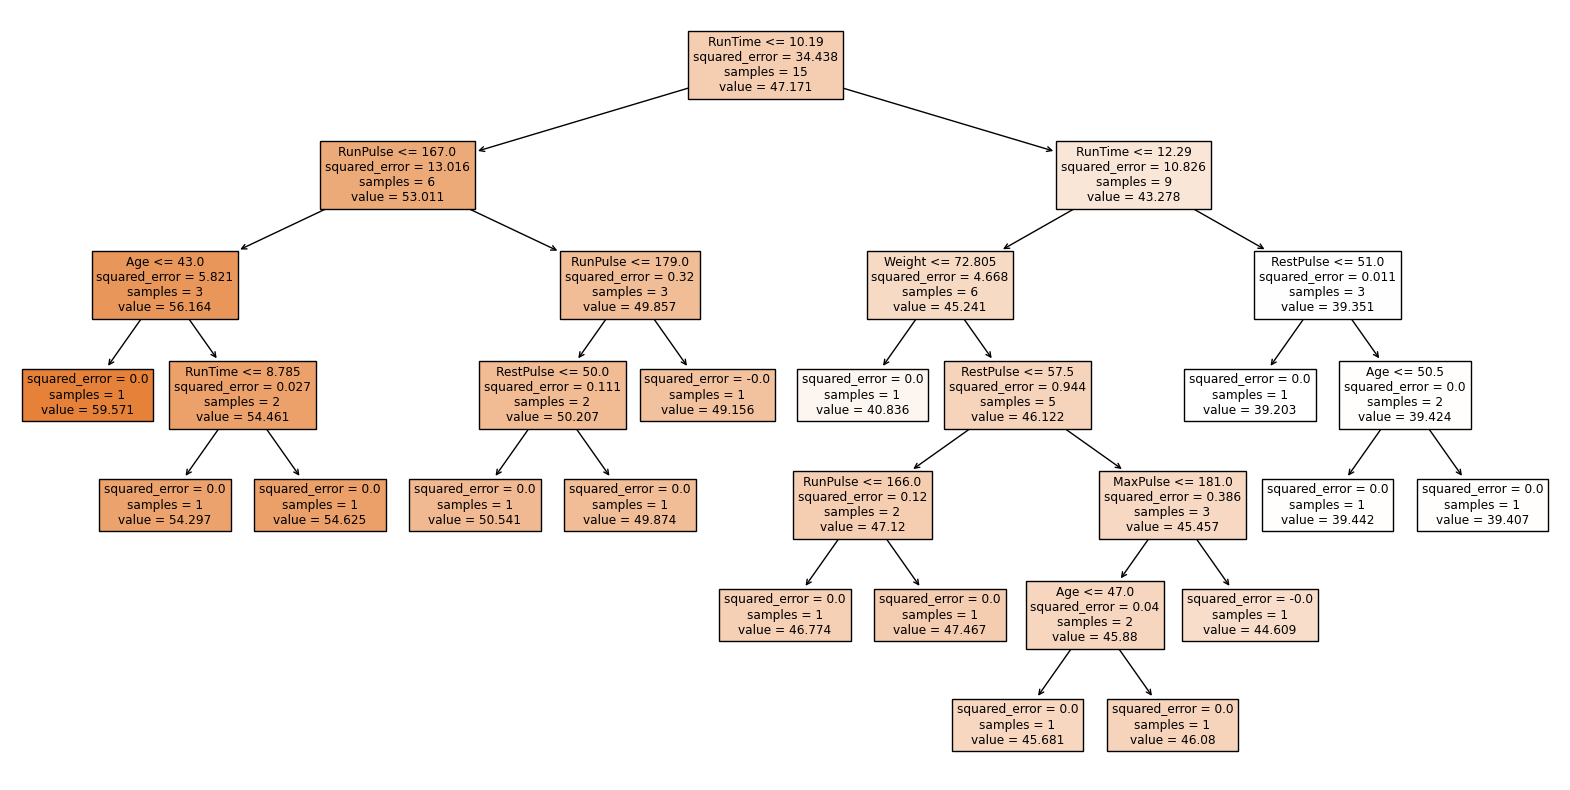

In [7]:
tree2 = DecisionTreeRegressor()
data2_train, data2_test, classification2_train, classification2_test = train_test_split(
    data2, regression2, test_size=0.5, random_state=2024
)
tree2.fit(data2_train, classification2_train)
train_score = tree2.score(data2_train, classification2_train)
test_score = tree2.score(data2_test, classification2_test)
print(f'Train score={train_score}, test score={test_score}')
plt.figure(figsize=(20, 10))
plot_tree(tree2, filled=True, feature_names=data2.columns)
plt.show()

### Task 2.2

Using the fitted model, answer the question: for which runner the oxygen consumption is assessed as the highest?

In [8]:
data2_with_predictions = data2.copy()
data2_with_predictions["Predicted Oxygen"] = tree2.predict(data2)
max_oxygen_runner_id = data2_with_predictions["Predicted Oxygen"].idxmax()
print(
    f"Runner with the highest oxygen consumption: \n{data2_with_predictions.loc[max_oxygen_runner_id]}"
)

Runner with the highest oxygen consumption: 
Age                  42.000
Weight               68.150
RunTime               8.170
RestPulse            40.000
RunPulse            166.000
MaxPulse            172.000
Predicted Oxygen     59.571
Name: 17, dtype: float64


### Task 2.3

Make a prediction for observation described by feature vector $x_0$, for which coordinates are equal to the means of the variables (so $x_0$ is a typical runner).

In [9]:
means = data2.mean()
x0 = means.values.reshape(1, -1)
x0 = pd.DataFrame(x0, columns=data2.columns)
prediction = tree2.predict(x0)
print(f"Prediction for a typical runner: {prediction[0]}")

Prediction for a typical runner: 47.467


## Task 3

Implement your own version of bagging algorithm. You can use available implementations of decision trees (or other base learners). Compare the accuracy (compute for different train-test splits) of bagging and single tree using the two above datasetes.

### Task 3.1

Implementation of the Bagging algorithm for classification and regression problems.

In [13]:
class BaggingEstimator(ABC):
    def __init__(self, base_estimator, n_estimators=10, random_state=None):
        self._base_estimator = base_estimator
        self._n_estimators = n_estimators
        self._random_state = random_state

    def fit(self, X, y):
        self._estimators = []
        for i in range(self._n_estimators):
            estimator = clone(self._base_estimator)
            X_resampled, y_resampled = resample(
                X, y, random_state=self._random_state + i
            )
            estimator.fit(X_resampled, y_resampled)
            self._estimators.append(estimator)

    def _predictions(self, X):
        return np.array([estimator.predict(X) for estimator in self._estimators])
    

    @abstractmethod
    def score(self, X, y):
        pass

    @abstractmethod
    def predict(self, X):
        pass


class BaggingClassifier(BaggingEstimator):
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

    def predict(self, X):
        return np.apply_along_axis(
            lambda x: np.bincount(x).argmax(), axis=0, arr=self._predictions(X)
        )


class BaggingRegressor(BaggingEstimator):
    def score(self, X, y):
        return r2_score(y, self.predict(X))

    def predict(self, X):
        return np.mean(self._predictions(X), axis=0)

### Task 3.2

Comparison of the accuracy of the Bagging algorithm and a single tree in classification problem.

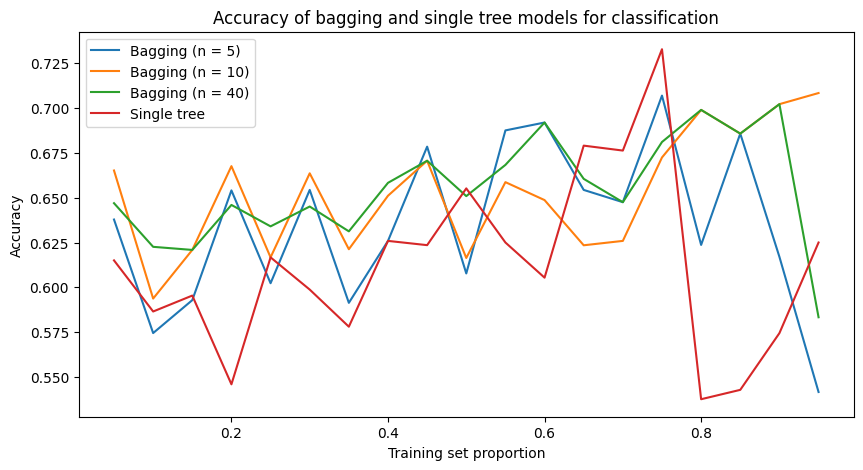

In [14]:
train_props = np.linspace(0.05, 0.95, 19)

bagging_tree1_5 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=5, random_state=2024
)
bagging_tree1_10 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=2024
)
bagging_tree1_40 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=40, random_state=2024
)
tree1 = DecisionTreeClassifier()

results1 = []
for train_prop in train_props:
    data1_train, data1_test, classification1_train, classification1_test = (
        train_test_split(
            data1, classification1, train_size=train_prop, random_state=2024
        )
    )
    bagging_tree1_5.fit(data1_train, classification1_train)
    bagging_tree1_10.fit(data1_train, classification1_train)
    bagging_tree1_40.fit(data1_train, classification1_train)
    tree1.fit(data1_train, classification1_train)
    results1.append(
        {
            "train_prop": train_prop,
            "bagging_score_5": bagging_tree1_5.score(data1_test, classification1_test),
            "bagging_score_10": bagging_tree1_10.score(
                data1_test, classification1_test
            ),
            "bagging_score_40": bagging_tree1_40.score(
                data1_test, classification1_test
            ),
            "tree_score": tree1.score(data1_test, classification1_test),
        }
    )

results1_df = pd.DataFrame(results1)
plt.figure(figsize=(10, 5))
plt.plot(
    results1_df["train_prop"], results1_df["bagging_score_5"], label="Bagging (n = 5)"
)
plt.plot(
    results1_df["train_prop"], results1_df["bagging_score_10"], label="Bagging (n = 10)"
)
plt.plot(
    results1_df["train_prop"], results1_df["bagging_score_40"], label="Bagging (n = 40)"
)
plt.plot(results1_df["train_prop"], results1_df["tree_score"], label="Single tree")
plt.xlabel("Training set proportion")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy of bagging and single tree models for classification")
plt.show()

### Task 3.3

Comparison of the accuracy of the Bagging algorithm and a single tree in regression problem.

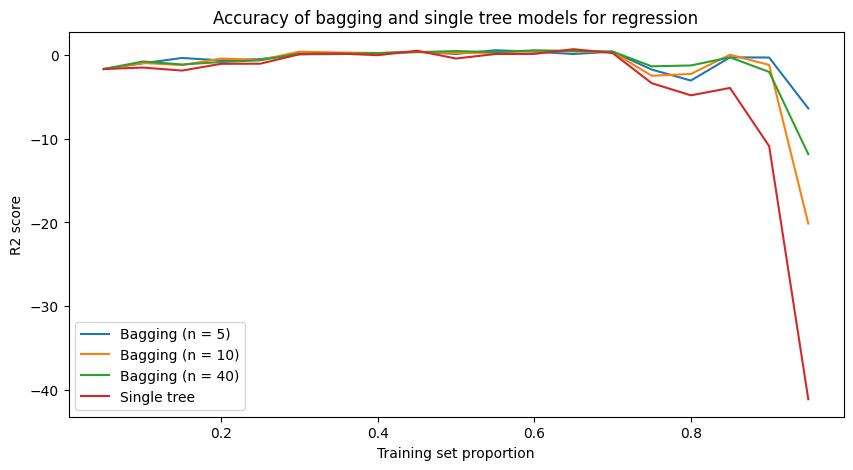

In [17]:
train_props = np.linspace(0.05, 0.95, 19)

bagging_tree2_5 = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(), n_estimators=5, random_state=2024
)
bagging_tree2_10 = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=2024
)
bagging_tree2_40 = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(), n_estimators=40, random_state=2024
)
tree2 = DecisionTreeRegressor()

results2 = []
for train_prop in train_props:
    data2_train, data2_test, regression2_train, regression2_test = train_test_split(
        data2, regression2, train_size=train_prop, random_state=2024
    )
    bagging_tree2_5.fit(data2_train, regression2_train)
    bagging_tree2_10.fit(data2_train, regression2_train)
    bagging_tree2_40.fit(data2_train, regression2_train)
    tree2.fit(data2_train, regression2_train)
    results2.append(
        {
            "train_prop": train_prop,
            "bagging_score_5": bagging_tree2_5.score(data2_test, regression2_test),
            "bagging_score_10": bagging_tree2_10.score(data2_test, regression2_test),
            "bagging_score_40": bagging_tree2_40.score(data2_test, regression2_test),
            "tree_score": tree2.score(data2_test, regression2_test),
        }
    )


results2_df = pd.DataFrame(results2)
plt.figure(figsize=(10, 5))
plt.plot(
    results2_df["train_prop"], results2_df["bagging_score_5"], label="Bagging (n = 5)"
)
plt.plot(
    results2_df["train_prop"], results2_df["bagging_score_10"], label="Bagging (n = 10)"
)
plt.plot(
    results2_df["train_prop"], results2_df["bagging_score_40"], label="Bagging (n = 40)"
)
plt.plot(results2_df["train_prop"], results2_df["tree_score"], label="Single tree")
plt.xlabel("Training set proportion")
plt.ylabel("R2 score")
plt.legend()
plt.title("Accuracy of bagging and single tree models for regression")
plt.show()